# Python Programming for Finance

This tutortial is from [pythonprogramming.net](https://pythonprogramming.net/finance-tutorials/)

Learn how to do finance with Pythob from getting data to manipulating data to formulating and testing trading strategies.

## 1. Introduction and Getting Stock Price Data

Hello and welcome to a Python for Finance tutorial series. In this series, we're going to run through the basics of importing financial (stock) data into Python using the Pandas framework. From here, we'll manipulate the data and attempt to come up with some sort of system for investing in companies, apply some machine learning, even some deep learning, and then learn how to back-test a strategy. I assume you know the fundamentals of Python. If you're not sure if that's you, click the fundamentals link, look at some of the topics in the series, and make a judgement call. If at any point you are stuck in this series or confused on a topic or concept, feel free to ask for help and I will do my best to help.

A common question that I am asked is whether or not I make a profit investing or trading with these techniques. I mostly play with finance data for fun and to practice my data analysis skills, but it actually does also influence my investment decisions to this day. I do not do active algorithmic trading with programming at the time of my writing this, but I have, and I have actually made a profit, but it's a lot more work than you might think to algorithmically trade. Finally, the knowledge about how to manipulate and analyze financial data, as well as how to backtest trading stategies, has *saved* me a ton of money.

None of the strategies presented here will make you an ultra wealthy person. If they would, I'd probably keep them to myself! The knowledge itself, however, can save you money, and even make you money.

Alright great, let's get started. To begin, I am using Python 3.5, but you should be able to get by with later versions. I will assume you already have Python installed. If you do not have 64 bit Python, but do have a 64bit operating system, get 64 bit Python, it'll help you a bit later. If you're on a 32 bit operating system, I am sorry for your situation, but you should be fine to follow most of this anyway.

Required Modules to start:

<li>Numpy</li>
<li>Matplotlib</li>
<li>Pandas</li>
<li>Pandas-datareader</li>
<li>BeautifulSoup4</li>
<li>scikit-learn / sklearn</li>

That'll do for now, we'll deal with other modules as they come up. To begin, let's cover how we might go about dealing with stock data using pandas, matplotlib and Python.

If you'd like to learn more on Matplotlib, check out the Data Visualization with Matplotlib tutorial series.

If you'd like to learn more on Pandas, check out the Data Analysis with Pandas tutorial series.

In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader as pdr

style.use('ggplot')

start = dt.datetime(2000,1,1)
end = dt.datetime.now()

#df = web.DataReader('TSLA','yahoo',start,end)

df = pdr.get_data_yahoo('TSLA')

In [2]:
print(df.head())

                 Open   High        Low      Close  Adj Close    Volume
Date                                                                   
2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900


In [3]:
print(df.tail())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-12-22  329.510010  330.920013  324.820007  325.200012  325.200012   
2017-12-26  323.829987  323.940002  316.579987  317.290009  317.290009   
2017-12-27  316.000000  317.679993  310.750000  311.640015  311.640015   
2017-12-28  311.750000  315.820007  309.540009  315.359985  315.359985   
2017-12-29  316.179993  316.410004  310.000000  311.350006  311.350006   

             Volume  
Date                 
2017-12-22  4215800  
2017-12-26  4378400  
2017-12-27  4712100  
2017-12-28  4316300  
2017-12-29  3762800  


## 2. Handling Data and Graphing
Hello and welcome to part 2 of the Python for Finance tutorial series. In this tutorial, we're going to further break down some basic data manipulation and visualizations with our stock data

In [4]:
df.to_csv('TSLA.csv')

In [5]:
df = pd.read_csv('TSLA.csv')
print(df.head())

         Date       Open   High        Low      Close  Adj Close    Volume
0  2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
1  2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2  2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
3  2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
4  2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900


In [6]:
df = pd.read_csv('TSLA.csv', parse_dates = True, index_col = 0)
print(df.head())

                 Open   High        Low      Close  Adj Close    Volume
Date                                                                   
2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300
2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100
2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800
2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800
2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900


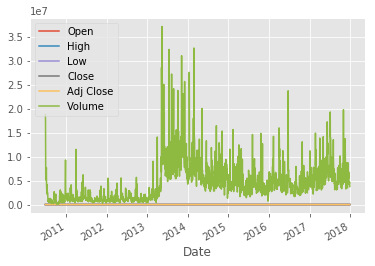

In [7]:
df.plot()
plt.show()

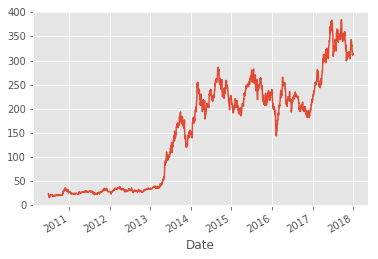

In [8]:
df['Adj Close'].plot()
plt.show()

In [9]:
print(df[['High','Low']].head())

             High        Low
Date                        
2010-06-29  25.00  17.540001
2010-06-30  30.42  23.299999
2010-07-01  25.92  20.270000
2010-07-02  23.10  18.709999
2010-07-06  20.00  15.830000


## 3. Basic Stock Data Manipulation
Hello and welcome to part 3 of the Python for Finance tutorial series. In this tutorial, we're going to further break down some basic data manipulation and visualizations with our stock data. 

The Pandas module comes equipped with a bunch of built-in functionality that you can leverage, along with ways to create custom Pandas functions. We'll cover some custom functions later, but, for now, let's do a very common operation to this data: Moving Averages.

The idea of a simple moving average is to take a window of time, and calculate the average price in that window. Then we shift that window over one period, and do it again. In our case, we'll do a 100 day rolling moving average. So this will take the current price, and the prices from the past 99 days, add them up, divide by 100, and there's your current 100-day moving average. Then we move the window over 1 day, and do the same thing again. 

In [10]:
df = pd.read_csv('TSLA.csv', parse_dates = True, index_col = 0)
df['100ma'] = df['Adj Close'].rolling(window=100).mean()
print(df.head())

                 Open   High        Low      Close  Adj Close    Volume  100ma
Date                                                                          
2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300    NaN
2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100    NaN
2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800    NaN
2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800    NaN
2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900    NaN


What happened? Under the 100ma column we just see NaN. We chose a 100 moving average, which theoretically requires 100 prior datapoints to compute, so we wont have any data here for the first 100 rows. NaN means "Not a Number." With Pandas, you can decide to do lots of things with missing data, but, for now, let's actually just change the minimum periods parameter:

In [11]:
df['100ma'] = df['Adj Close'].rolling(window=100,min_periods=0).mean()
print(df.head())

                 Open   High        Low      Close  Adj Close    Volume  \
Date                                                                      
2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300   
2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100   
2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800   
2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800   
2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900   

                100ma  
Date                   
2010-06-29  23.889999  
2010-06-30  23.860000  
2010-07-01  23.226666  
2010-07-02  22.220000  
2010-07-06  20.998000  


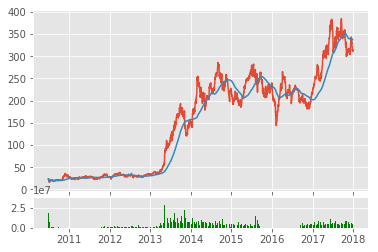

In [13]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'], color='g')

plt.show()

Full code up to this point:

                 Open   High        Low      Close  Adj Close    Volume  \
Date                                                                      
2010-06-29  19.000000  25.00  17.540001  23.889999  23.889999  18766300   
2010-06-30  25.790001  30.42  23.299999  23.830000  23.830000  17187100   
2010-07-01  25.000000  25.92  20.270000  21.959999  21.959999   8218800   
2010-07-02  23.000000  23.10  18.709999  19.200001  19.200001   5139800   
2010-07-06  20.000000  20.00  15.830000  16.110001  16.110001   6866900   

                100ma  
Date                   
2010-06-29  23.889999  
2010-06-30  23.860000  
2010-07-01  23.226666  
2010-07-02  22.220000  
2010-07-06  20.998000  


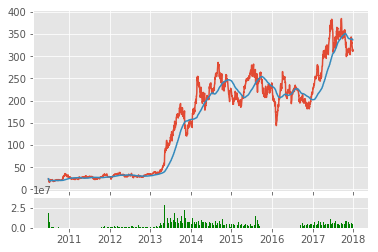

In [2]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
style.use('ggplot')

df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
print(df.head())

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'], color='g')

plt.show()

## 4. More stock manipulations

Hello and welcome to part 4 of the Python for Finance tutorial series. In this tutorial, we're going to create a candlestick / OHLC graph based on the Adj Close column, which will allow me to cover resampling and a few more data visualization concepts.

An OHLC chart, called a candlestick chart, is a chart that condenses the open, high, low, and close data all in one nice format. Plus it makes pretty colors, and remember what I told you about good looking charts?

Unfortunately, making candlestick graphs right from Pandas isn't built in, even though creating OHLC data is. One day, I am sure this graph type will be made available, but, today, it isn't. That's alright though, we'll make it happen! First, we need to make two new imports:

In [41]:
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates

The first import is the OHLC graph type from matplotlib, and the second import is the special mdates type that...is mostly just a pain in the butt, but that's the date type for matplotlib graphs. Pandas automatically handles that for you, but, like I said, we don't have that luxury yet with candlesticks.

First, we need proper OHLC data. Our current data does have OHLC values, and, unless I am mistaken, Tesla has never had a split, but you wont always be this lucky. Thus, we're going to create our own OHLC data, which will also allow us to show another data transformation that comes from Pandas:

In [42]:
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

print(df_ohlc.head())

                 open       high        low      close
Date                                                  
2010-06-29  23.889999  23.889999  15.800000  17.459999
2010-07-09  17.400000  20.639999  17.049999  20.639999
2010-07-19  21.910000  21.910000  20.219999  20.719999
2010-07-29  20.350000  21.950001  19.590000  19.590000
2010-08-08  19.600000  19.600000  17.600000  19.150000


That's expected, but, we want to now move this information to matplotlib, as well as convert the dates to the mdates version. Since we're just going to graph the columns in Matplotlib, we actually don't want the date to be an index anymore, so we can do:

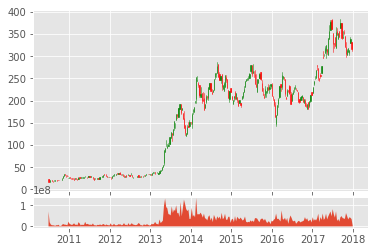

In [43]:
df_ohlc = df_ohlc.reset_index()
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

fig = plt.figure()
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1,sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)

#The fill_between function will graph x, y, then what to fill to/between. 
#In our case, we're choosing 0.
plt.show()

Full code for this tutorial:

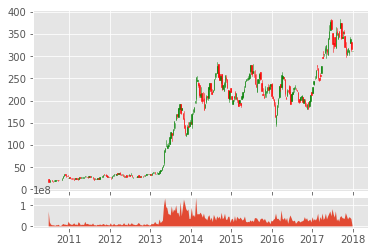

In [4]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader.data as web
style.use('ggplot')

df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)

df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').sum()

df_ohlc.reset_index(inplace=True)
df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1, df_ohlc.values, width=5, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num), df_volume.values, 0)
plt.show()

## 5. Automating getting the S&P500 list
Hello and welcome to part 5 of the Python for Finance tutorial series. In this tutorial and the next few, we're going to be working on how we can go about grabbing pricing information en masse for a larger list of companies, and then how we can work with all of this data at once.

To begin, we need a list of companies. I could just hand you a list, but actually acquiring a list of stocks can be just one of the many challenges you might encounter. In our case, we want a Python list of the S&P 500 companies.

Whether you are looking for the Dow Jones companies, the S&P 500, or the Russell 3000, chances are, someone somewhere has posted a post of these companies. You will want to make sure it is up-to-date, but chances are it's not already in the perfect format for you. In our case, we're going to grab the list from Wikipedia: http://en.wikipedia.org/wiki/List_of_S%26P_500_companies.

The tickers/symbols in Wikipedia are organized on a table. To handle for this, we're going to use the HTML parsing library, Beautiful Soup. If you would like to learn more about Beautiful Soup, I have a quick 4-part tutorial on web scraping with Beautiful Soup.

In [5]:
import bs4 as bs
import pickle
import requests

def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:# tr table raw
        ticker = row.findAll('td')[0].text #tb table data
        tickers.append(ticker)
        
    with open("sp500tickers.pickle","wb") as f:
        pickle.dump(tickers,f)
        
    return tickers

save_sp500_tickers()

['MMM',
 'ABT',
 'ABBV',
 'ACN',
 'ATVI',
 'AYI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AET',
 'AMG',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALXN',
 'ALGN',
 'ALLE',
 'AGN',
 'ADS',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'APC',
 'ADI',
 'ANDV',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AIV',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ARNC',
 'AJG',
 'AIZ',
 'T',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BHGE',
 'BLL',
 'BAC',
 'BK',
 'BCR',
 'BAX',
 'BBT',
 'BDX',
 'BRK.B',
 'BBY',
 'BIIB',
 'BLK',
 'HRB',
 'BA',
 'BWA',
 'BXP',
 'BSX',
 'BHF',
 'BMY',
 'AVGO',
 'BF.B',
 'CHRW',
 'CA',
 'COG',
 'CDNS',
 'CPB',
 'COF',
 'CAH',
 'CBOE',
 'KMX',
 'CCL',
 'CAT',
 'CBG',
 'CBS',
 'CELG',
 'CNC',
 'CNP',
 'CTL',
 'CERN',
 'CF',
 'SCHW',
 'CHTR',
 'CHK',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'XEC',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',


## 6. Gitting all company pricing data in the S&P500
Hello and welcome to part 6 of the Python for Finance tutorial series. In the previous finance with Python tutorial, we covered how to acquire the list of companies that we're interested in (S&P 500 in our case), and now we're going to pull stock pricing data on all of them.

In [6]:
import bs4 as bs
import datetime as dt
import os
import pandas as pd
import pandas_datareader.data as pdr
import pickle
import requests


def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
        
    with open("sp500tickers.pickle","wb") as f:
        pickle.dump(tickers,f)
        
    return tickers

#save_sp500_tickers()


def get_data_from_yahoo(reload_sp500=False):
    
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle","rb") as f:
            tickers = pickle.load(f)
    
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')

    start = dt.datetime(2000, 1, 1)
    end = dt.datetime.now()
    
    for ticker in tickers:
        # just in case your connection breaks, we'd like to save our progress!
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = pdr.get_data_yahoo(ticker, start, end)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))

get_data_from_yahoo()

Already have MMM
Already have ABT
Already have ABBV
Already have ACN
Already have ATVI
Already have AYI
Already have ADBE
Already have AMD
Already have AAP
Already have AES
Already have AET
Already have AMG
Already have AFL
Already have A
Already have APD
Already have AKAM
Already have ALK
Already have ALB
Already have ARE
Already have ALXN
Already have ALGN
Already have ALLE
Already have AGN
Already have ADS
Already have LNT
Already have ALL
Already have GOOGL
Already have GOOG
Already have MO
Already have AMZN
Already have AEE
Already have AAL
Already have AEP
Already have AXP
Already have AIG
Already have AMT
Already have AWK
Already have AMP
Already have ABC
Already have AME
Already have AMGN
Already have APH
Already have APC
Already have ADI
Already have ANDV
Already have ANSS
Already have ANTM
Already have AON
Already have AOS
Already have APA
Already have AIV
Already have AAPL
Already have AMAT
Already have APTV
Already have ADM
Already have ARNC
Already have AJG
Already have AI

RemoteDataError: Unable to read URL: https://query1.finance.yahoo.com/v7/finance/download/BRK.B?period1=946656000&period2=1514995199&interval=1d&events=history&crumb=%5Cu002FXGUBmrckhp

In [11]:
sp500_tickers = ['MMM','ABT','ABBV','ACN','ATVI','AYI','ADBE','AMD','AAP','AES','AET','AMG','AFL','A','APD','AKAM','ALK','ALB','ARE','ALXN','ALGN','ALLE','AGN','ADS','LNT','ALL','GOOGL','GOOG','MO','AMZN','AEE','AAL','AEP','AXP','AIG','AMT','AWK','AMP','ABC','AME','AMGN','APH','APC','ADI','ANDV','ANSS','ANTM','AON','AOS','APA','AIV','AAPL','AMAT','APTV','ADM','ARNC','AJG','AIZ','T','ADSK','ADP','AZO','AVB','AVY','BHGE','BLL','BAC','BK','BCR','BAX','BBT','BDX','BRK-B','BBY','BIIB','BLK','HRB','BA','BWA','BXP','BSX','BHF','BMY','AVGO','BF-B','CHRW','CA','COG','CDNS','CPB','COF','CAH','CBOE','KMX','CCL','CAT','CBG','CBS','CELG','CNC','CNP','CTL','CERN','CF','SCHW','CHTR','CHK','CVX','CMG','CB','CHD','CI','XEC','CINF','CTAS','CSCO','C','CFG','CTXS','CLX','CME','CMS','KO','CTSH','CL','CMCSA','CMA','CAG','CXO','COP','ED','STZ','COO','GLW','COST','COTY','CCI','CSRA','CSX','CMI','CVS','DHI','DHR','DRI','DVA','DE','DAL','XRAY','DVN','DLR','DFS','DISCA','DISCK','DISH','DG','DLTR','D','DOV','DWDP','DPS','DTE','DRE','DUK','DXC','ETFC','EMN','ETN','EBAY','ECL','EIX','EW','EA','EMR','ETR','EVHC','EOG','EQT','EFX','EQIX','EQR','ESS','EL','ES','RE','EXC','EXPE','EXPD','ESRX','EXR','XOM','FFIV','FB','FAST','FRT','FDX','FIS','FITB','FE','FISV','FLIR','FLS','FLR','FMC','FL','F','FTV','FBHS','BEN','FCX','GPS','GRMN','IT','GD','GE','GGP','GIS','GM','GPC','GILD','GPN','GS','GT','GWW','HAL','HBI','HOG','HRS','HIG','HAS','HCA','HCP','HP','HSIC','HSY','HES','HPE','HLT','HOLX','HD','HON','HRL','HST','HPQ','HUM','HBAN','IDXX','INFO','ITW','ILMN','IR','INTC','ICE','IBM','INCY','IP','IPG','IFF','INTU','ISRG','IVZ','IQV','IRM','JEC','JBHT','SJM','JNJ','JCI','JPM','JNPR','KSU','K','KEY','KMB','KIM','KMI','KLAC','KSS','KHC','KR','LB','LLL','LH','LRCX','LEG','LEN','LUK','LLY','LNC','LKQ','LMT','L','LOW','LYB','MTB','MAC','M','MRO','MPC','MAR','MMC','MLM','MAS','MA','MAT','MKC','MCD','MCK','MDT','MRK','MET','MTD','MGM','KORS','MCHP','MU','MSFT','MAA','MHK','TAP','MDLZ','MON','MNST','MCO','MS','MOS','MSI','MYL','NDAQ','NOV','NAVI','NTAP','NFLX','NWL','NFX','NEM','NWSA','NWS','NEE','NLSN','NKE','NI','NBL','JWN','NSC','NTRS','NOC','NCLH','NRG','NUE','NVDA','ORLY','OXY','OMC','OKE','ORCL','PCAR','PKG','PH','PDCO','PAYX','PYPL','PNR','PBCT','PEP','PKI','PRGO','PFE','PCG','PM','PSX','PNW','PXD','PNC','RL','PPG','PPL','PX','PCLN','PFG','PG','PGR','PLD','PRU','PEG','PSA','PHM','PVH','QRVO','PWR','QCOM','DGX','RRC','RJF','RTN','O','RHT','REG','REGN','RF','RSG','RMD','RHI','ROK','COL','ROP','ROST','RCL','CRM','SBAC','SCG','SLB','SNI','STX','SEE','SRE','SHW','SIG','SPG','SWKS','SLG','SNA','SO','LUV','SPGI','SWK','SBUX','STT','SRCL','SYK','STI','SYMC','SYF','SNPS','SYY','TROW','TPR','TGT','TEL','FTI','TXN','TXT','TMO','TIF','TWX','TJX','TMK','TSS','TSCO','TDG','TRV','TRIP','FOXA','FOX','TSN','UDR','ULTA','USB','UA','UAA','UNP','UAL','UNH','UPS','URI','UTX','UHS','UNM','VFC','VLO','VAR','VTR','VRSN','VRSK','VZ','VRTX','VIAB','V','VNO','VMC','WMT','WBA','DIS','WM','WAT','WEC','WFC','HCN','WDC','WU','WRK','WY','WHR','WMB','WLTW','WYN','WYNN','XEL','XRX','XLNX','XL','XYL','YUM','ZBH','ZION','ZTS']

In [24]:
import bs4 as bs
import datetime as dt
import os
import pandas as pd
import pandas_datareader.data as pdr
import pickle
import requests

def get_data_from_yahoo(tickers=False):
    
    tickers = sp500_tickers
    
    
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')

    start = dt.datetime(2000, 1, 1)
    end = dt.datetime.now()
    
    for ticker in tickers:
        
        # just in case your connection breaks, we'd like to save our progress!
        if not os.path.exists('stock_dfs/{}.csv'.format(ticker)):
            df = pdr.get_data_yahoo(ticker, start, end)
            df.to_csv('stock_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))

get_data_from_yahoo()

Already have MMM
Already have ABT
Already have ABBV
Already have ACN
Already have ATVI
Already have AYI
Already have ADBE
Already have AMD
Already have AAP
Already have AES
Already have AET
Already have AMG
Already have AFL
Already have A
Already have APD
Already have AKAM
Already have ALK
Already have ALB
Already have ARE
Already have ALXN
Already have ALGN
Already have ALLE
Already have AGN
Already have ADS
Already have LNT
Already have ALL
Already have GOOGL
Already have GOOG
Already have MO
Already have AMZN
Already have AEE
Already have AAL
Already have AEP
Already have AXP
Already have AIG
Already have AMT
Already have AWK
Already have AMP
Already have ABC
Already have AME
Already have AMGN


RemoteDataError: Unable to read URL: https://query1.finance.yahoo.com/v7/finance/download/ANDV?period1=946656000&period2=1515081599&interval=1d&events=history&crumb=%5Cu002Fc37ldr8GJM

## Alternative source for S&P500 using Quandl

In [25]:
import quandl
import bs4 as bs
import datetime as dt
import os
import pandas as pd
import pandas_datareader.data as pdr
import pickle
import requests

quandl.ApiConfig.api_key = 'quandlapi.key'

In [28]:
sp500_tickers = ['MMM','ABT','ABBV','ACN','ATVI','AYI','ADBE','AMD','AAP','AES','AET','AMG','AFL','A','APD','AKAM','ALK','ALB','ARE','ALXN','ALGN','ALLE','AGN','ADS','LNT','ALL','GOOGL','GOOG','MO','AMZN','AEE','AAL','AEP','AXP','AIG','AMT','AWK','AMP','ABC','AME','AMGN','APH','APC','ADI','ANDV','ANSS','ANTM','AON','AOS','APA','AIV','AAPL','AMAT','APTV','ADM','ARNC','AJG','AIZ','T','ADSK','ADP','AZO','AVB','AVY','BHGE','BLL','BAC','BK','BCR','BAX','BBT','BDX','BRK_B','BBY','BIIB','BLK','HRB','BA','BWA','BXP','BSX','BHF','BMY','AVGO','BF_B','CHRW','CA','COG','CDNS','CPB','COF','CAH','CBOE','KMX','CCL','CAT','CBG','CBS','CELG','CNC','CNP','CTL','CERN','CF','SCHW','CHTR','CHK','CVX','CMG','CB','CHD','CI','XEC','CINF','CTAS','CSCO','C','CFG','CTXS','CLX','CME','CMS','KO','CTSH','CL','CMCSA','CMA','CAG','CXO','COP','ED','STZ','COO','GLW','COST','COTY','CCI','CSRA','CSX','CMI','CVS','DHI','DHR','DRI','DVA','DE','DAL','XRAY','DVN','DLR','DFS','DISCA','DISCK','DISH','DG','DLTR','D','DOV','DWDP','DPS','DTE','DRE','DUK','DXC','ETFC','EMN','ETN','EBAY','ECL','EIX','EW','EA','EMR','ETR','EVHC','EOG','EQT','EFX','EQIX','EQR','ESS','EL','ES','RE','EXC','EXPE','EXPD','ESRX','EXR','XOM','FFIV','FB','FAST','FRT','FDX','FIS','FITB','FE','FISV','FLIR','FLS','FLR','FMC','FL','F','FTV','FBHS','BEN','FCX','GPS','GRMN','IT','GD','GE','GGP','GIS','GM','GPC','GILD','GPN','GS','GT','GWW','HAL','HBI','HOG','HRS','HIG','HAS','HCA','HCP','HP','HSIC','HSY','HES','HPE','HLT','HOLX','HD','HON','HRL','HST','HPQ','HUM','HBAN','IDXX','INFO','ITW','ILMN','IR','INTC','ICE','IBM','INCY','IP','IPG','IFF','INTU','ISRG','IVZ','IQV','IRM','JEC','JBHT','SJM','JNJ','JCI','JPM','JNPR','KSU','K','KEY','KMB','KIM','KMI','KLAC','KSS','KHC','KR','LB','LLL','LH','LRCX','LEG','LEN','LUK','LLY','LNC','LKQ','LMT','L','LOW','LYB','MTB','MAC','M','MRO','MPC','MAR','MMC','MLM','MAS','MA','MAT','MKC','MCD','MCK','MDT','MRK','MET','MTD','MGM','KORS','MCHP','MU','MSFT','MAA','MHK','TAP','MDLZ','MON','MNST','MCO','MS','MOS','MSI','MYL','NDAQ','NOV','NAVI','NTAP','NFLX','NWL','NFX','NEM','NWSA','NWS','NEE','NLSN','NKE','NI','NBL','JWN','NSC','NTRS','NOC','NCLH','NRG','NUE','NVDA','ORLY','OXY','OMC','OKE','ORCL','PCAR','PKG','PH','PDCO','PAYX','PYPL','PNR','PBCT','PEP','PKI','PRGO','PFE','PCG','PM','PSX','PNW','PXD','PNC','RL','PPG','PPL','PX','PCLN','PFG','PG','PGR','PLD','PRU','PEG','PSA','PHM','PVH','QRVO','PWR','QCOM','DGX','RRC','RJF','RTN','O','RHT','REG','REGN','RF','RSG','RMD','RHI','ROK','COL','ROP','ROST','RCL','CRM','SBAC','SCG','SLB','SNI','STX','SEE','SRE','SHW','SIG','SPG','SWKS','SLG','SNA','SO','LUV','SPGI','SWK','SBUX','STT','SRCL','SYK','STI','SYMC','SYF','SNPS','SYY','TROW','TPR','TGT','TEL','FTI','TXN','TXT','TMO','TIF','TWX','TJX','TMK','TSS','TSCO','TDG','TRV','TRIP','FOXA','FOX','TSN','UDR','ULTA','USB','UA','UAA','UNP','UAL','UNH','UPS','URI','UTX','UHS','UNM','VFC','VLO','VAR','VTR','VRSN','VRSK','VZ','VRTX','VIAB','V','VNO','VMC','WMT','WBA','DIS','WM','WAT','WEC','WFC','HCN','WDC','WU','WRK','WY','WHR','WMB','WLTW','WYN','WYNN','XEL','XRX','XLNX','XL','XYL','YUM','ZBH','ZION','ZTS']

In [30]:
def get_data_from_quandl(tickers=False):
    
    tickers = sp500_tickers
    
    if not os.path.exists('Stocks_dfs'):
        os.makedirs('Stocks_dfs')

    start = dt.datetime(2000, 1, 1)
    end = dt.datetime.now()
    
    for ticker in tickers:
        # just in case your connection breaks, we'd like to save our progress!
        if not os.path.exists('Stocks_dfs/{}.csv'.format(ticker)):
            query = "WIKI/"+str(ticker)
            df = pdr.DataReader(query, 'quandl', start, end)
            df.to_csv('Stocks_dfs/{}.csv'.format(ticker))
        else:
            print('Already have {}'.format(ticker))

get_data_from_quandl()

## 7. Combining all S&P 500 company prices into one DataFrame

Hello and welcome to part 7 of the Python for Finance tutorial series. In the previous tutorial, we grabbed the Yahoo Finance data for the entire S&P 500 of companies. In this tutorial, we're going to bring this data together into one DataFrame.

In [35]:
## Determine the columns since quandl has different format than yahoo finance.
df = pd.read_csv('Stocks_dfs/AAPL.csv')

df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'ExDividend',
       'SplitRatio', 'AdjOpen', 'AdjHigh', 'AdjLow', 'AdjClose', 'AdjVolume'],
      dtype='object')

In [38]:
def compile_data():
    tickers = sp500_tickers
    
    main_df =pd.DataFrame()
    
    for count, ticker in enumerate(tickers):
        df = pd.read_csv('Stocks_dfs/{}.csv'.format(ticker))
        df.set_index('Date', inplace=True)
        
        df.rename(columns={'AdjClose':ticker}, inplace=True)
        df.drop(['Open', 'High', 'Low', 'Close', 'Volume', 'ExDividend',
       'SplitRatio', 'AdjOpen', 'AdjHigh', 'AdjLow', 'AdjVolume'],1,inplace=True)
        
        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how='outer')
        
        if count % 10 == 0:
            print(count)
    
    print(main_df.head())
    main_df.to_csv('sp500_joined_adjclose.csv')
    
compile_data()

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
                  MMM        ABT  ABBV  ACN      ATVI  AYI       ADBE     AMD  \
Date                                                                            
2000-01-03  30.790071  10.071733   NaN  NaN  1.252334  NaN  16.277607  15.500   
2000-01-04  29.566689   9.783969   NaN  NaN  1.214246  NaN  14.912036  14.625   
2000-01-05  31.073895   9.729294   NaN  NaN  1.218816  NaN  15.177701  14.655   
2000-01-06  32.884500  10.109142   NaN  NaN  1.195202  NaN  15.331638  16.000   
2000-01-07  33.536970  10.215615   NaN  NaN  1.227958  NaN  16.076495  16.250   

            AAP        AES ...   WYNN       XEL        XRX       XLNX  \
Date                       ...                                          
2000-01-03  NaN  27.856077 ...    NaN  8.469647  74.282588  34.902729   
2000-01-04  NaN  26.

## 8. Creating massive S&P 500 company correlation table for relationships
Hello and welcome to part 8 of the Python for Finance tutorial series. In the previous tutorial, we showed how to combine all of the daily pricing data for the S&P 500 companies. In this tutorial, we're going to see if we can find any interesting correlation data. To do this, we'd like to visualize it, since it's a lot of data. We're going to use Matplotlib for this, along with Numpy.

           MMM       ABT      ABBV       ACN      ATVI       AYI      ADBE  \
MMM   1.000000  0.955076  0.936969  0.975235  0.942285  0.932936  0.947867   
ABT   0.955076  1.000000  0.937198  0.965892  0.896562  0.897641  0.897045   
ABBV  0.936969  0.937198  1.000000  0.891162  0.868555  0.562130  0.926665   
ACN   0.975235  0.965892  0.891162  1.000000  0.936784  0.934554  0.933514   
ATVI  0.942285  0.896562  0.868555  0.936784  1.000000  0.866385  0.970590   

           AMD       AAP       AES    ...         WYNN       XEL       XRX  \
MMM  -0.395720  0.891890 -0.219049    ...     0.681530  0.961622 -0.028753   
ABT  -0.478678  0.899765 -0.176773    ...     0.758658  0.955928 -0.079961   
ABBV  0.647717  0.253933 -0.073344    ...    -0.047650  0.875954 -0.173812   
ACN  -0.358595  0.895433  0.145379    ...     0.705480  0.986206 -0.054501   
ATVI -0.325936  0.754710 -0.182811    ...     0.557060  0.942207 -0.111844   

          XLNX        XL       XYL       YUM       ZBH      ZI

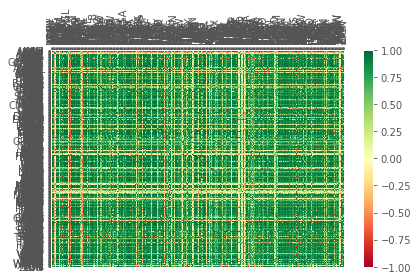

In [40]:
import bs4 as bs
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import os
import pandas as pd
import pandas_datareader.data as web
import pickle
import requests

style.use('ggplot')

def visualize_data():
    df = pd.read_csv('sp500_joined_adjclose.csv')
    #df['AAPL'].plot()
    #plt.show()
    df_corr = df.corr()
    print(df_corr.head())
    df_corr.to_csv('sp500corr.csv')
    
    data1 = df_corr.values
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)

    heatmap1 = ax1.pcolor(data1, cmap=plt.cm.RdYlGn)
    fig1.colorbar(heatmap1)

    ax1.set_xticks(np.arange(data1.shape[1]) + 0.5, minor=False)
    ax1.set_yticks(np.arange(data1.shape[0]) + 0.5, minor=False)
    ax1.invert_yaxis()
    ax1.xaxis.tick_top()
    
    column_labels = df_corr.columns
    row_labels = df_corr.index
    
    ax1.set_xticklabels(column_labels)
    ax1.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap1.set_clim(-1,1)
    plt.tight_layout()
    #plt.savefig("correlations.png", dpi = (300))
    plt.show()
    
visualize_data()

## 9. Preprocessing data for Machine Learning with stock data
Hello and welcome to part 9 of the Python for Finance tutorial series. In the previous tutorials, we've covered how to pull in stock pricing data for a large number of companies, how to combine that data into one large dataset, and how to visually represent at least one relationship between all of the companies. Now, we're going to try to take this data and do some machine learning with it!

The idea is to see what might happen if we took data from all of the current companies, and fed this through some sort of machine learning classifier. We know that, over time, various companies have different relationships with eachother, so, if the machine can recognize and fit these relationships, it's possible we could predict from changes in prices today, what will happen tomorrow with a specific company. Let's try!

To begin, all machine learning does is take "featuresets" and attempts to map them to "labels." Whether we're doing K Nearest Neighbors or deep learning with neural networks, this remains the same. Thus, we need to convert our existing data to featuresets and labels.

Our features can be other company's prices, but we're going to instead say the features are the pricing changes that day for all companies. Our label will be whether or not we actually want to buy a specific company. Let's say we're considering Exxon (XOM). What we'll do for featuresets is take into account all company percent changes that day, and those will be our features. Our label will be whether or not Exxon (XOM) rose more than x% within the next x days, where we can pick whatever we want for x. To start, let's say a company is a buy if, within the next 7 days, its price goes up more than 2% and it is a sell if the price goes down more than 2% within those 7 days.

This is something we could also relatively easily make a strategy for. If the algorithm says buy, we can buy, place a 2% drop stop-loss (basically something that tells the exchange is price falls below this number / or goes above if you're shorting the company, then exit my position). Otherwise, sell the company once it has risen 2%, or you could be conservative and sell at 1% rise...etc. Regardless, you could relatively easily build a strategy from this classifier. In order to begin, we need the prices into the future for our training data.

I am going to keep coding in our same script. If this is a problem to you, feel free to create a new file and import the functions we use.

In [42]:
def process_data_for_labels(ticker):
    hm_days = 7
    df = pd.read_csv('sp500_joined_adjclose.csv', index_col=0)
    tickers = df.columns.values.tolist()
    df.fillna(0, inplace=True)
    
    for i in range(1,hm_days+1):
        df['{}_{}d'.format(ticker,i)] = (df[ticker].shift(-i) - df[ticker]) / df[ticker]
        
    df.fillna(0, inplace=True)
    return tickers, df

process_data_for_labels('AAPL')

(['MMM',
  'ABT',
  'ABBV',
  'ACN',
  'ATVI',
  'AYI',
  'ADBE',
  'AMD',
  'AAP',
  'AES',
  'AET',
  'AMG',
  'AFL',
  'A',
  'APD',
  'AKAM',
  'ALK',
  'ALB',
  'ARE',
  'ALXN',
  'ALGN',
  'ALLE',
  'AGN',
  'ADS',
  'LNT',
  'ALL',
  'GOOGL',
  'GOOG',
  'MO',
  'AMZN',
  'AEE',
  'AAL',
  'AEP',
  'AXP',
  'AIG',
  'AMT',
  'AWK',
  'AMP',
  'ABC',
  'AME',
  'AMGN',
  'APH',
  'APC',
  'ADI',
  'ANDV',
  'ANSS',
  'ANTM',
  'AON',
  'AOS',
  'APA',
  'AIV',
  'AAPL',
  'AMAT',
  'APTV',
  'ADM',
  'ARNC',
  'AJG',
  'AIZ',
  'T',
  'ADSK',
  'ADP',
  'AZO',
  'AVB',
  'AVY',
  'BHGE',
  'BLL',
  'BAC',
  'BK',
  'BCR',
  'BAX',
  'BBT',
  'BDX',
  'BRK_B',
  'BBY',
  'BIIB',
  'BLK',
  'HRB',
  'BA',
  'BWA',
  'BXP',
  'BSX',
  'BHF',
  'BMY',
  'AVGO',
  'BF_B',
  'CHRW',
  'CA',
  'COG',
  'CDNS',
  'CPB',
  'COF',
  'CAH',
  'CBOE',
  'KMX',
  'CCL',
  'CAT',
  'CBG',
  'CBS',
  'CELG',
  'CNC',
  'CNP',
  'CTL',
  'CERN',
  'CF',
  'SCHW',
  'CHTR',
  'CHK',
  'CVX',
  'C

## 10. Creating target for Machine Learning labels (Part 1)
Hello and welcome to part 10 (and 11) of the Python for Finance tutorial series. In the previous tutorial, we began to build our labels for our attempt at using machine learning for investing with Python. In this tutorial, we're going to use what we did last tutorial to actually generate our labels when we're ready.

Now we're going to create the function that creates our label. We have a lot of choices here. You might want to have something that dictates buy, sell, or hold, or maybe just buy or sell. I am going to have us do the former. Basically, if the price rises more than 2% in the next 7 days, we're going to say that's a buy. If it drops more than 2% in the next 7 days, that's a sell. If it doesn't do either of those, then it's not moving enough, and we're going to just hold whatever our position is. If we have shares in that company, we do nothing, we keep our position. If we don't have shares in that company, we do nothing, we just wait. Our function to do this:

In [43]:
def buy_sell_hold(*args):
    cols = [c for c in args]
    requirement = 0.02
    for col in cols:
        if col > requirement:
            return 1
        if col < -requirement:
            return -1
    return 0

## 11. Creating target for Machine Learning labels (Part 2)
We're using args here so we can take any number of columns here that we want. The idea here is that we're going to map this function to a Pandas DataFrame column, and that column will be our "label." A -1 is a sell, 0 is hold, and 1 is a buy. The *args will be those future price change columns, and we're interested if we see movement that exceeds 2% in either direction. Do note, this isn't a totally perfect function. For example, price might go up 2%, then fall 2%, and we might not be prepared for that, but it will do for now.

With that, let's actually make our features and labels! For this function, we're going to add the following import:

In [44]:
from collections import Counter

This will let us see the distributions of classes both in our dataset and in our algorithm's predictions. We dont want to feed highly imbalanced datasets to machine learning classifiers, and we also want to see if our classifier is predicting only one class.

This function will take any ticker, create the needed dataset, and create our "target" column, which is our label. The target column will have either a -1, 0, or 1 for each row, based on our function and the columns we feed through. Now, we can get the distribution:

We probably have some totally missing data, which we'll replace with 0. Next we probably have some infinite data, especially if we did a percent change from 0 to anything. We're going to convert infinite values to NaNs, then we're going to drop NaNs. We're *almost* ready to rumble, but right now our "features" are that day's prices for stocks. Just static numbers, really nothing telling at all. Instead, a better metric would be every company's percent change that day. The idea here being that some companies will change in price before others, and we can profit maybe on the laggards. We'll convert the stock prices to % changes:

Again, being careful about infinite numbers, and then filling any other missing data, and, now, finally, we are ready to create our features and labels:

The capital X contains our featuresets (daily % changes for every company in the S&P 500). The lowercase y is our "target" or our "label." Basically what we're trying to map our featuresets to.

Alright, we've got features and labels, we're ready to do some machine learning, which is what we'll cover in the next tutorial.

In [54]:
def extract_featuresets(ticker):
    tickers, df = process_data_for_labels(ticker)
    
    days = 7
    for i in range(1,days+1):
        df['{}_target'.format(ticker)] = list(map( buy_sell_hold, df['{}_{}d'.format(ticker, i)] ))
    
    vals = df['{}_target'.format(ticker)].values.tolist()
    str_vals = [str(i) for i in vals]
    print('Data spread:',Counter(str_vals))
    df.fillna(0, inplace=True)
    df = df.replace([np.inf, -np.inf], np.nan)
    df.dropna(inplace=True)
    
    df_vals = df[[ticker for ticker in tickers]].pct_change()
    df_vals = df_vals.replace([np.inf, -np.inf], 0)
    df_vals.fillna(0, inplace=True)
    
    X = df_vals.values
    y = df['{}_target'.format(ticker)].values
    
    return X,y,df
extract_featuresets('AAPL')

Data spread: Counter({'1': 1881, '0': 1337, '-1': 1312})


(array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.03973299, -0.02857143,  0.        , ...,  0.        ,
         -0.04846847,  0.        ],
        [ 0.0509765 , -0.00558824,  0.        , ...,  0.        ,
          0.00473395,  0.        ],
        ..., 
        [ 0.        , -0.00678733, -0.01104407, ..., -0.00887064,
         -0.00993377, -0.00483492],
        [ 0.        ,  0.03013843,  0.01757833, ...,  0.02809315,
         -0.00255754, -0.00374792],
        [ 0.        ,  0.00221126,  0.01564882, ...,  0.00693213,
         -0.00118343,  0.00459802]]),
 array([-1, -1, -1, ...,  0,  0,  0], dtype=int64),
                    MMM        ABT   ABBV     ACN       ATVI     AYI  \
 Date                                                                  
 2000-01-03   30.790071  10.071733   0.00    0.00   1.252334    0.00   
 2000-01-04   29.566689   9.783969   0.00    0.00   1.214246    0.00   
 2000-01-05   31.073895   9.7292

## 12. Machine Learning against S&P 500 company prices

Hello and welcome to part 12 of the Python for Finance tutorial series. In the previous tutorial, we covered how to take our data and create featuresets and labels out of it, which we can then feed through a machine learning algorithm with the hope that it will learn to map relationships of existing price changes to future price changes for a company.

We're going to add the following imports:

In [55]:
from sklearn import svm, cross_validation, neighbors
from sklearn.ensemble import VotingClassifier, RandomForestClassifier

Sklearn is a machine learning framework. If you don't have it, make sure you download it: pip install scikit-learn. The svm import is for a Support Vector Machine, cross_validation will let us easily create shuffled training and testing samples, and neighbors is for K Nearest Neighbors. Then, we're bringing in the VotingClassifier and RandomForestClassifier. The voting classifier is just what it sounds like. Basically, it's a classifier that will let us combine many classifiers, and allow them to each get a "vote" on what they think the class of the featuresets is. The random forest classifier is just another classifier. We're going to use three classifiers in our voting classifier.

In [56]:
def do_ml(ticker):
    X, y, df = extract_featuresets(ticker)

    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25)

    #clf = neighbors.KNeighborsClassifier()

    clf = VotingClassifier([('lsvc',svm.LinearSVC()),
                            ('knn',neighbors.KNeighborsClassifier()),
                            ('rfor',RandomForestClassifier())])


    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print('accuracy:',confidence)
    predictions = clf.predict(X_test)
    print('predicted class counts:',Counter(predictions))
    print()
    print()
    return confidence


do_ml('AAPL')

Data spread: Counter({'1': 1881, '0': 1337, '-1': 1312})
accuracy: 0.355123674912
predicted class counts: Counter({-1: 508, 1: 383, 0: 241})




0.3551236749116608

In [57]:
do_ml('GOOGL')

Data spread: Counter({'0': 2469, '1': 1213, '-1': 848})
accuracy: 0.528735632184
predicted class counts: Counter({0: 913, -1: 128, 1: 90})




0.52873563218390807

In [58]:
do_ml('SPG')

Data spread: Counter({'0': 2112, '1': 1506, '-1': 912})
accuracy: 0.427184466019
predicted class counts: Counter({0: 812, 1: 212, -1: 109})




0.42718446601941745

In [59]:
do_ml('JPM')

Data spread: Counter({'0': 1715, '1': 1553, '-1': 1262})
accuracy: 0.3759929391
predicted class counts: Counter({0: 600, -1: 355, 1: 178})




0.37599293909973519